Obtain the State Statewide Landslide Information Database for Oregon (SLIDO) from the official DOGAMI website: https://www.oregon.gov/dogami/slido/Pages/data.aspx 

Create a directory 'Data' in your projects root folder and place the downloaded files inside it.

# Inspect the Layers in the GDB Dataset 

In [8]:
import fiona
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

gdb_dir = "../data/Oregon/SLIDO_Release_4p5_wMetadata.gdb"
layers = fiona.listlayers(gdb_dir)
print("Layers in SLIDO-4.5 geodatabase:")
for lyr in layers:
    print("  -", lyr)


Layers in SLIDO-4.5 geodatabase:
  - Index_LS_Studies
  - Detailed_Deep_Landslide_Susceptibility
  - References
  - Detailed_Susceptibility_Map_Index
  - Historic_Landslide_Points
  - Scarp_Flanks
  - Scarps
  - Deposits
  - Inventory_Map_Index
  - Inventory_Map_Index_2
  - Inventory_Map_Index_3
  - References_Check_In_Map_Index_3


In [9]:
for lyr in layers:
    df = gpd.read_file(gdb_dir, layer=lyr)
    print(f"{lyr:35s} {len(df):6d} data points")


Index_LS_Studies                        72 data points


/opt/anaconda3/envs/nlp/lib/python3.13/site-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts. The processing may be really slow.  You can skip the processing by setting METHOD=SKIP, or only make it analyze counter-clock wise parts by setting METHOD=ONLY_CCW if you can assume that the outline of holes is counter-clock wise defined
  return ogr_read(


Detailed_Deep_Landslide_Susceptibility      4 data points
References                             376 data points
Detailed_Susceptibility_Map_Index       12 data points
Historic_Landslide_Points            15386 data points
Scarp_Flanks                         28650 data points
Scarps                               55824 data points
Deposits                             71318 data points
Inventory_Map_Index                   1569 data points
Inventory_Map_Index_2                  355 data points
Inventory_Map_Index_3                  355 data points
References_Check_In_Map_Index_3         21 data points


In [10]:
references = gpd.read_file(gdb_dir, layer='References')
print("\nReferences layer:")
print(references.head())


References layer:
   REF_ID_COD     SCALE                                          REFERENCE  \
0   AchJA1991  1:24,000  Ach, J.A., Bateson, J.T., 1991, Geologic map o...   
1  AllaJC2001  1:25,000  Allan, J.C.; Priest, G.R., 2001, Evaluation of...   
2  AlleJE1988  1:24,000  Allen, J.E., 1988, Geologic Hazards in the Col...   
3  AndeJL1978  1:24,000  Anderson, J. L., 1978, The stratigraphy and st...   
4  AshlRP1966  1:21,100  Ashley, R.P., 1966, Metamorphic petrology and ...   

   DATE  
0  1991  
1  2001  
2  1988  
3  1978  
4  1966  


In [11]:
len(references)

376

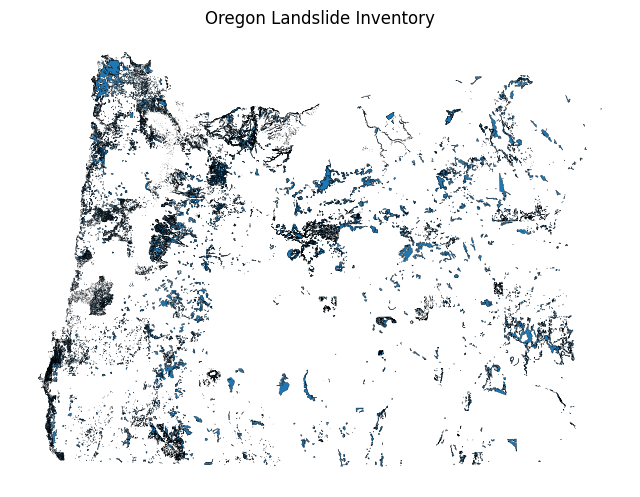

In [12]:
deposits = gpd.read_file(gdb_dir, layer="Deposits")

deposits.plot(figsize=(8, 6), edgecolor="k", linewidth=0.2)
plt.title("Oregon Landslide Inventory")
plt.axis("off")
plt.show()

## Description of Each Layer

https://www.oregon.gov/dogami/slido/pages/data.aspx

# Inspect Deposits Layer

This feature class consists of polygons delineating landslide deposits (including debris flow fans and talus extent).

This is a map layer that draws a polygon shape around the pile of debris that was left behind after a landslide. It also includes features like debris flow fans (fan-shaped deposits at the mouth of a canyon) and talus (piles of loose rock at the base of a cliff)

This is the most direct evidence of where landslides have occurred.

## Initial Inspection

In [13]:
# Analyze the Deposits polygons
deposits = gpd.read_file(gdb_dir, layer="Deposits")

In [14]:
print("Total deposits:", len(deposits))

Total deposits: 71318


In [15]:
# Basic info
print(deposits.shape)      
print(deposits.dtypes)     # field names and types

(71318, 33)
UNIQUE_ID         object
TYPE_MOVE         object
MOVE_CLASS        object
MOVE_CODE         object
CONFIDENCE        object
AGE               object
DATE_MOVE         object
NAME              object
GEOL              object
SLOPE            float32
HS_HEIGHT        float32
FAN_HEIGHT       float32
FAIL_DEPTH       float32
DEEP_SHAL         object
HS_IS1           float32
IS1_IS2          float32
IS2_IS3          float32
IS3_IS4          float32
HD_AVE           float32
DIRECT           float32
AREA             float32
VOL              float32
REF_ID_COD        object
MAP_UNIT_L        object
DESCRIPTION       object
YEAR             float64
DATE_RANGE        object
REACTIVATION      object
MONTH             object
DAY               object
Shape_Length     float64
Shape_Area       float64
geometry        geometry
dtype: object


In [16]:
import pandas as pd

def completeness(df: pd.DataFrame):
    total = len(df)
    comp = df.count()               # non-null counts per column
    pct = (comp / total * 100).round(1)
    return pd.DataFrame({"non_null": comp, "% filled": pct})

df_completeness = completeness(deposits)
print(df_completeness)
# print(completeness(deposits))


              non_null  % filled
UNIQUE_ID        71318     100.0
TYPE_MOVE        42383      59.4
MOVE_CLASS       42357      59.4
MOVE_CODE        42271      59.3
CONFIDENCE       42127      59.1
AGE              42388      59.4
DATE_MOVE         3932       5.5
NAME              4088       5.7
GEOL             41432      58.1
SLOPE            60079      84.2
HS_HEIGHT        50453      70.7
FAN_HEIGHT       44436      62.3
FAIL_DEPTH       50489      70.8
DEEP_SHAL        29868      41.9
HS_IS1           38187      53.5
IS1_IS2          37122      52.1
IS2_IS3          36299      50.9
IS3_IS4          35940      50.4
HD_AVE           46342      65.0
DIRECT           58062      81.4
AREA             61271      85.9
VOL              58717      82.3
REF_ID_COD       71318     100.0
MAP_UNIT_L       34199      48.0
DESCRIPTION      71318     100.0
YEAR               265       0.4
DATE_RANGE         386       0.5
REACTIVATION        21       0.0
MONTH               81       0.1
DAY       

In [17]:
df_completeness.sort_values(by='% filled', ascending=False)

,non_null,% filled
UNIQUE_ID,71318,100.0
REF_ID_COD,71318,100.0
Shape_Area,71318,100.0
Shape_Length,71318,100.0
DESCRIPTION,71318,100.0
geometry,71318,100.0
AREA,61271,85.9
SLOPE,60079,84.2
VOL,58717,82.3
DIRECT,58062,81.4


<details markdown='1'>
<summary> <h2> Column Details </h2> </summary>
This was compiled using Gemini 2.5 Pro and the metadata present at https://pubs.oregon.gov/dogami/SLIDO/4.5/XML/Deposits_metadata.xml. 
So these descriptions might be totally wrong but just putting here for some reference


UNIQUE_ID: A unique identifier for each landslide polygon.

TYPE_MOVE: Classifies the dominant type of movement for the landslide. This would be one of the following categories: 1) slides, 2) flows, 3) spreads, 4) topples, 5) falls, or 6) complex (a combination of types).

MOVE_CLASS: A classification based on the material involved and the mode of movement.

MOVE_CODE: A condensed code that combines the movement type and material (e.g., "DFL" for a Debris Flow).

CONFIDENCE: An assessment of the certainty of the landslide identification (high, moderate, or low).

AGE: The estimated age of the landslide (historical is < 150 years, prehistorical is > 150 years).

DATE_MOVE: The full, specific date of the landslide failure, if known (e.g., YYYY-MM-DD).

NAME: The formal or informal name given to the landslide.

GEOL: The underlying geologic unit in which the landslide occurred.

SLOPE: The angle, in degrees, of the slope where the landslide occurred.

HS_HEIGHT: The vertical change in elevation from the bottom to the top of the landslide's main head scarp.

FAN_HEIGHT: The vertical change in elevation from the top to the toe of a debris flow fan.

FAIL_DEPTH: The estimated thickness of the material that failed.

DEEP_SHAL: A classification of the landslide's depth, either shallow-seated (< 15 feet deep) or deep-seated (> 15 feet deep).

HS_IS1: The horizontal distance from the main head scarp to the first internal scarp.

IS1_IS2: The horizontal distance from internal scarp #1 to internal scarp #2.

IS2_IS3: The horizontal distance from internal scarp #2 to internal scarp #3.

IS3_IS4: The horizontal distance from internal scarp #3 to internal scarp #4.

HD_AVE: The calculated average horizontal distance between the scarps.

DIRECT: The primary direction of movement of the landslide (e.g., NW, 270°).

AREA: The surface area of the landslide deposit polygon.

VOL: The estimated volume of the landslide deposit.

REF_ID_COD: A unique code that identifies the original source map or study.

MAP_UNIT_L: The original map unit label for the landslide as it appeared on the source map.

DESCRIPTION: A descriptive text field classifying the deposit type (e.g., "landslide", "flow", "talus-colluvium").

YEAR: The four-digit year of the landslide failure.

DATE_RANGE: A range of dates for when the failure occurred, if the exact date is unknown.

REACTIVATION: The date or year when a pre-existing landslide showed renewed movement.

MONTH: The month of the landslide failure.

DAY: The day of the month of the landslide failure.

Shape_Length: The perimeter length of the landslide polygon feature.

Shape_Area: The total area of the landslide polygon feature.

geometry: The spatial data (coordinates) that defines the shape and location of each landslide polygon.

</details>

In [18]:
import pandas as pd
current_max_columns = pd.get_option('display.max_columns')
print(current_max_columns)
pd.set_option('display.max_columns', 40)

20


In [19]:
deposits.head(10) 

,UNIQUE_ID,TYPE_MOVE,MOVE_CLASS,MOVE_CODE,CONFIDENCE,AGE,DATE_MOVE,NAME,GEOL,SLOPE,HS_HEIGHT,FAN_HEIGHT,FAIL_DEPTH,DEEP_SHAL,HS_IS1,IS1_IS2,IS2_IS3,IS3_IS4,HD_AVE,DIRECT,AREA,VOL,REF_ID_COD,MAP_UNIT_L,DESCRIPTION,YEAR,DATE_RANGE,REACTIVATION,MONTH,DAY,Shape_Length,Shape_Area,geometry
0,WASH_CO2,Flow,Debris Flow,DFL,High (=>30),Historic (<150yrs),,,vol.M.cr.gr.nd.nd.bas,4.256579,0.0,3.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,11291.700195,1.129170e+04,HairRW2021,None,Fan,NaN,None,None,None,None,447.239405,11291.764767,"MULTIPOLYGON (((699810 1325184.192, 699822.282..."
1,WASH_CO3,Flow,Debris Flow,DFL,High (=>30),Historic (<150yrs),,,vol.M.cr.gr.nd.nd.bas,3.350513,0.0,3.0,0.0,,0.0,0.0,0.0,0.0,0.0,180.0,13701.000000,1.370100e+04,HairRW2021,None,Fan,NaN,None,None,None,None,455.775817,13701.014637,"MULTIPOLYGON (((699860.473 1325401.027, 699873..."
2,WASH_CO4,Flow,Debris Flow,DFL,High (=>30),Historic (<150yrs),,,vol.M.cr.gr.nd.nd.bas,5.811321,0.0,4.0,0.0,,0.0,0.0,0.0,0.0,0.0,337.5,14879.299805,1.983900e+04,HairRW2021,None,Fan,NaN,None,None,None,None,568.959463,14879.315815,"MULTIPOLYGON (((700295.984 1325083.866, 700283..."
3,WASH_CO5,Flow,Debris Flow,DFL,High (=>30),Historic (<150yrs),,,sed.Q.qsd.mf.nd.nd.fine,5.413578,0.0,8.0,0.0,,0.0,0.0,0.0,0.0,0.0,315.0,20034.699219,5.342590e+04,HairRW2021,None,Fan,NaN,None,None,None,None,591.097110,20034.804942,"MULTIPOLYGON (((700696.889 1325351.537, 700659..."
4,WASH_CO6,Flow,Debris Flow,DFL,High (=>30),Historic (<150yrs),,,vol.M.cr.gr.nd.nd.bas,13.638928,0.0,8.0,0.0,,0.0,0.0,0.0,0.0,0.0,270.0,8462.679688,2.256720e+04,HairRW2021,None,Fan,NaN,None,None,None,None,391.627031,8462.716893,"MULTIPOLYGON (((699242.636 1321687.547, 699279..."
5,WASH_CO11,Flow,Debris Flow,DFL,High (=>30),Historic (<150yrs),,,vol.M.cr.nd.nd.nd.bas,5.380375,0.0,55.0,0.0,,0.0,0.0,0.0,0.0,0.0,337.5,461309.000000,8.457330e+06,HairRW2021,None,Fan,NaN,None,None,None,None,2705.628678,461310.890608,"MULTIPOLYGON (((700263.758 1311720.874, 700254..."
6,WASH_CO19,Flow,Debris Flow,DFL,High (=>30),Historic (<150yrs),,,vol.M.cr.gr.nd.nd.bas,11.531453,0.0,10.0,0.0,,0.0,0.0,0.0,0.0,0.0,315.0,11482.200195,3.827410e+04,HairRW2021,None,Fan,NaN,None,None,None,None,403.179519,11482.280780,"MULTIPOLYGON (((691666.195 1323857.923, 691623..."
7,WASH_CO25,Flow,Debris Flow,DFL,High (=>30),Historic (<150yrs),,,vol.M.cr.gr.nd.nd.bas,19.382622,0.0,7.0,0.0,,0.0,0.0,0.0,0.0,0.0,112.5,4976.819824,1.161260e+04,HairRW2021,None,Fan,NaN,None,None,None,None,297.430619,4976.837334,"MULTIPOLYGON (((681220.236 1323932.356, 681252..."
8,WASH_CO26,Flow,Debris Flow,DFL,High (=>30),Historic (<150yrs),,,vol.M.cr.gr.nd.nd.bas,11.278392,0.0,2.0,0.0,,0.0,0.0,0.0,0.0,0.0,315.0,15291.299805,1.019420e+04,HairRW2021,None,Fan,NaN,None,None,None,None,511.863683,15291.400746,"MULTIPOLYGON (((682715.793 1324962.409, 682692..."
9,WASH_CO29,Flow,Debris Flow,DFL,High (=>30),Historic (<150yrs),,,vol.M.cr.gr.nd.nd.bas,14.840835,0.0,23.0,0.0,,0.0,0.0,0.0,0.0,0.0,315.0,49191.898438,3.771380e+05,HairRW2021,None,Fan,NaN,None,None,None,None,1000.389564,49192.130896,"MULTIPOLYGON (((684773.614 1323881.25, 684789...."


In [20]:
deposits.tail(10)

,UNIQUE_ID,TYPE_MOVE,MOVE_CLASS,MOVE_CODE,CONFIDENCE,AGE,DATE_MOVE,NAME,GEOL,SLOPE,HS_HEIGHT,FAN_HEIGHT,FAIL_DEPTH,DEEP_SHAL,HS_IS1,IS1_IS2,IS2_IS3,IS3_IS4,HD_AVE,DIRECT,AREA,VOL,REF_ID_COD,MAP_UNIT_L,DESCRIPTION,YEAR,DATE_RANGE,REACTIVATION,MONTH,DAY,Shape_Length,Shape_Area,geometry
71308,MUP0468,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,McClJD2020b,Qaly,Fan,NaN,None,None,None,None,2527.138105,1.906307e+05,"MULTIPOLYGON (((1033102.665 1368789.687, 10331..."
71309,MUP0675,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,McClJD2020,Qoaf,Fan,NaN,None,None,None,None,944.956631,2.604387e+04,"MULTIPOLYGON (((1668390.706 641354.799, 166837..."
71310,MUP0680,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,McClJD2020,Qoaf,Fan,NaN,None,None,None,None,2882.302301,2.143446e+05,"MULTIPOLYGON (((1669798.513 642778.966, 166980..."
71311,MUP0676,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,McClJD2020,Qoaf,Fan,NaN,None,None,None,None,2070.731782,9.758690e+04,"MULTIPOLYGON (((1671879.918 643486.009, 167188..."
71312,MUP0678,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,McClJD2020,Qoaf,Fan,NaN,None,None,None,None,881.583896,3.325131e+04,"MULTIPOLYGON (((1671583.698 643657.076, 167158..."
71313,MUP0679,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,McClJD2020,Qoaf,Fan,NaN,None,None,None,None,2020.949971,2.135725e+05,"MULTIPOLYGON (((1670081.413 643690.771, 167009..."
71314,MUP0677,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,McClJD2020,Qoaf,Fan,NaN,None,None,None,None,1693.085011,9.375315e+04,"MULTIPOLYGON (((1671976.214 643937.528, 167197..."
71315,MUP0190,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,McClJD2020,Qoaf,Fan,NaN,None,None,None,None,11801.953030,3.286369e+06,"MULTIPOLYGON (((1675317.186 645153.674, 167533..."
71316,MUP0681,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,McClJD2020,Qoaf,Fan,NaN,None,None,None,None,19172.525716,3.105893e+06,"MULTIPOLYGON (((1668737.065 645342.293, 166888..."
71317,MUP0057,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,McClJD2020,Qoaf,Fan,NaN,None,None,None,None,31639.564651,1.320346e+07,"MULTIPOLYGON (((1658521.16 686230.443, 1658534..."


In [21]:
deposits['source'] = deposits['UNIQUE_ID'].str.replace(r'\d+$', '', regex=True)

# List all of the independent sources
unique_sources = deposits['source'].unique()
# print(unique_sources) 
print(len(unique_sources), "unique sources found")

for source in unique_sources:
    print(source)


404 unique sources found
WASH_CO
Morrow_
Benton_
Wasco_
Oregon_City_
Oregon_CIty_
Astoria_
Lake_Oswego_
Canby_
Portland_
MertSA2007a_
McClJD2010_
FranRH2007_
MadiIP2007_
MertSA2007b_
MertSA2008_
MertSA2009_
AllaJC2001_
BaldEM1952_
AlleJE1988_
BaldEM1955_
baldem1956_
BaldEM1961_
BaldEM1969_
BaldEM1973_
BaraP1991_
BeauJD1976hazards_
SnavPD1996_
WalkGW2002_
WangZ2001_
WellRE1995_
BeauJD1973hazards_
BeauJD1974bhazards_
BeauJD1975hazards_
BeauJD1977ahazards_
BeauJD1977bhazards_
BelaJL1981_
BelaJL1982_
BlacGL1987_
BlacGL1995_
BlacGL2000_
BroeL1995_
BrooHC1984_
BrowDE1980_
BurnSF1997_
BussC2006_
EvarRC2002_
FernML2006a_
FernML2006b_
FernML2006c_
HampER1972_
HladFR2006_
HoovL1963_
MadiIP2006a_
McclJD2006a_
McclJD2006b_
MoorR2004_
MurrRB2006a_
NiemAR1985_
NiemAR1990_
PeteNV1976Redmond_
PrieGR1987_
PrieGR1988_
PrieGR2004a_
RobiPT1975_
SchlHG1967Plate3_
SchlHG1972hazards_
SchlHG1973_
SchlHG1974hazards_
SchlHG1975_
SchlHG1979hazards_
SHERDR1995_
SherDR1991_
SnavPD1976b_
SnavPD1976c_
WalkGW1989_
We

## Analysis

In [22]:
# Seperating deposits by column types
numerical_cols = deposits.select_dtypes(include=['number']).columns.tolist()

non_numerical_cols = deposits.select_dtypes(exclude=['number']).columns.tolist()

In [23]:
print("Numerical Columns:")
for col in numerical_cols:
    print(f"  - {col}")

print("\nNon-Numerical Columns:")
for col in non_numerical_cols:
    print(f"  - {col}")

Numerical Columns:
  - SLOPE
  - HS_HEIGHT
  - FAN_HEIGHT
  - FAIL_DEPTH
  - HS_IS1
  - IS1_IS2
  - IS2_IS3
  - IS3_IS4
  - HD_AVE
  - DIRECT
  - AREA
  - VOL
  - YEAR
  - Shape_Length
  - Shape_Area

Non-Numerical Columns:
  - UNIQUE_ID
  - TYPE_MOVE
  - MOVE_CLASS
  - MOVE_CODE
  - CONFIDENCE
  - AGE
  - DATE_MOVE
  - NAME
  - GEOL
  - DEEP_SHAL
  - REF_ID_COD
  - MAP_UNIT_L
  - DESCRIPTION
  - DATE_RANGE
  - REACTIVATION
  - MONTH
  - DAY
  - geometry
  - source


### Numerical Analysis

In [24]:
print("\nStatistical summary for Numerical data:")
numerical_stats = deposits[numerical_cols].describe().T
print(numerical_stats[["min", "max", "mean", "std"]])


Statistical summary for Numerical data:
                      min           max          mean           std
SLOPE            0.000000  3.150000e+02  1.543780e+01  1.359943e+01
HS_HEIGHT        0.000000  8.000000e+02  2.421672e+01  3.736176e+01
FAN_HEIGHT       0.000000  3.000000e+02  4.178093e+00  1.062210e+01
FAIL_DEPTH       0.000000  7.727407e+02  2.087894e+01  3.190569e+01
HS_IS1           0.000000  3.000000e+03  2.754217e+01  9.112600e+01
IS1_IS2          0.000000  2.200000e+03  1.967058e+01  8.145781e+01
IS2_IS3          0.000000  2.000000e+03  1.129428e+01  6.334519e+01
IS3_IS4          0.000000  1.793000e+03  5.788208e+00  4.534037e+01
HD_AVE           0.000000  4.379000e+03  2.441268e+01  9.578618e+01
DIRECT           0.000000  3.600000e+02  1.257856e+02  1.234211e+02
AREA             0.000000  5.512616e+09  7.241649e+05  2.446707e+07
VOL              0.000000  7.573330e+10  2.863226e+07  5.891731e+08
YEAR          1890.000000  2.017000e+03  1.996630e+03  1.428229e+01
Shape_L

In [25]:
# Avoiding scientific notation 
# Set the display format to use commas and have 2 decimal places
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [26]:
# Calculating statistics while excluding zeros
numerical_data_for_stats = deposits[numerical_cols].copy()

# Replace every 0 with NaN (Not a Number)
numerical_data_for_stats.replace(0, np.nan, inplace=True)

print("\nStatistical summary for Numerical data (excluding 0s):")

stats_no_zeros = numerical_data_for_stats.describe().T
print(stats_no_zeros[["min", "max", "mean", "std"]])


Statistical summary for Numerical data (excluding 0s):
                  min               max          mean            std
SLOPE            0.91            315.00         22.03          10.89
HS_HEIGHT        0.50            800.00         43.29          40.86
FAN_HEIGHT       0.50            300.00         14.53          15.56
FAIL_DEPTH       0.35            772.74         37.06          34.74
HS_IS1           4.00          3,000.00        178.47         163.94
IS1_IS2          6.00          2,200.00        197.19         177.53
IS2_IS3          9.00          2,000.00        202.86         182.28
IS3_IS4         13.00          1,793.00        200.61         179.43
HD_AVE          10.00          4,379.00        203.70         200.10
DIRECT          20.00            360.00        189.71         104.15
AREA             7.88  5,512,616,448.00  1,042,535.38  29,351,248.00
VOL             44.19 75,733,303,296.00 41,694,364.00 710,593,728.00
YEAR         1,890.00          2,017.00      1,

### Non Numerical Analysis

In [27]:
print("\nNon-Numerical Columns:")
for col in non_numerical_cols:
    print(f"  - {col}")


Non-Numerical Columns:
  - UNIQUE_ID
  - TYPE_MOVE
  - MOVE_CLASS
  - MOVE_CODE
  - CONFIDENCE
  - AGE
  - DATE_MOVE
  - NAME
  - GEOL
  - DEEP_SHAL
  - REF_ID_COD
  - MAP_UNIT_L
  - DESCRIPTION
  - DATE_RANGE
  - REACTIVATION
  - MONTH
  - DAY
  - geometry
  - source


In [ ]:
# Subset the DataFrame with non-numerical columns
non_numerical_df = deposits[non_numerical_cols]  

# Print completeness for just non-numerical columns
print("\nCompleteness of Non-Numerical Columns:")

df_completeness_non_numerical = completeness(non_numerical_df)

df_completeness_non_numerical.sort_values(by='% filled', ascending=False, inplace=True)
print(df_completeness_non_numerical)


Completeness of Non-Numerical Columns:
              non_null  % filled
UNIQUE_ID        71318     100.0
REF_ID_COD       71318     100.0
DESCRIPTION      71318     100.0
geometry         71318     100.0
AGE              42388      59.4
TYPE_MOVE        42383      59.4
MOVE_CLASS       42357      59.4
MOVE_CODE        42271      59.3
CONFIDENCE       42127      59.1
GEOL             41432      58.1
MAP_UNIT_L       34199      48.0
DEEP_SHAL        29868      41.9
NAME              4088       5.7
DATE_MOVE         3932       5.5
DATE_RANGE         386       0.5
MONTH               81       0.1
DAY                 42       0.1
REACTIVATION        21       0.0


#### Age

In [21]:
print("\nValue counts for 'AGE' ")
print(deposits['AGE'].value_counts())


Value counts for 'AGE' 
AGE
Pre-Historic (>150yrs)    27070
Historic (<150yrs)        15237
Historic (<150 years)        81
Name: count, dtype: int64


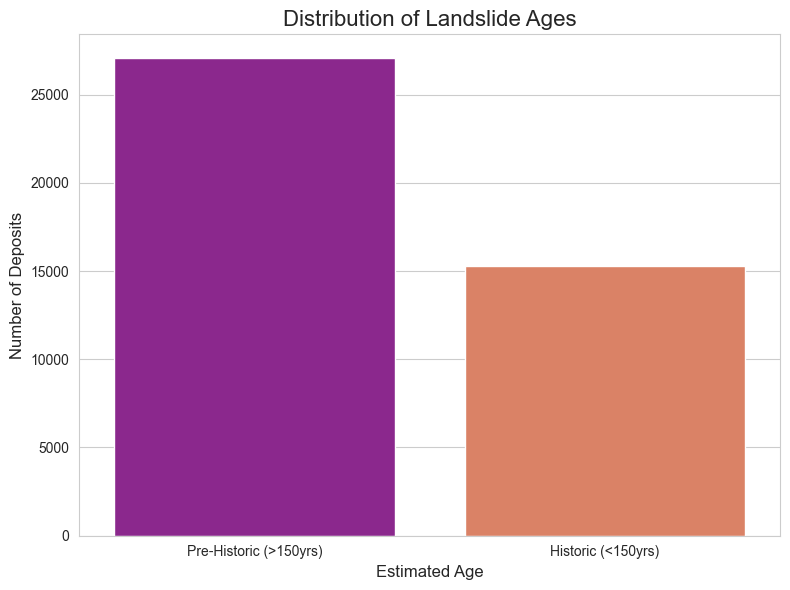

In [33]:
# First clean the 'AGE' column to combine the similar 'Historic' categories.
deposits['AGE_cleaned'] = deposits['AGE'].replace('Historic (<150 years)', 'Historic (<150yrs)')

age_counts = deposits['AGE_cleaned'].value_counts()

plt.figure(figsize=(8, 6))

sns.barplot(x=age_counts.index, y=age_counts.values, palette='plasma', hue=age_counts.index)

plt.title('Distribution of Landslide Ages', fontsize=16)
plt.xlabel('Estimated Age', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

plt.tight_layout()
plt.show()

#### Type Move

In [25]:
print("\nValue counts for 'TYPE_MOVE':")
print(deposits['TYPE_MOVE'].value_counts())


Value counts for 'TYPE_MOVE':
TYPE_MOVE
Flow            24475
Slide           13009
Complex          3898
Fall              772
Slide+Flow        206
Earth               7
Spread              6
Flow+Flow           3
Slide+Slide         2
Flow+Slide          2
Slide               2
Slide+Spread        1
Name: count, dtype: int64


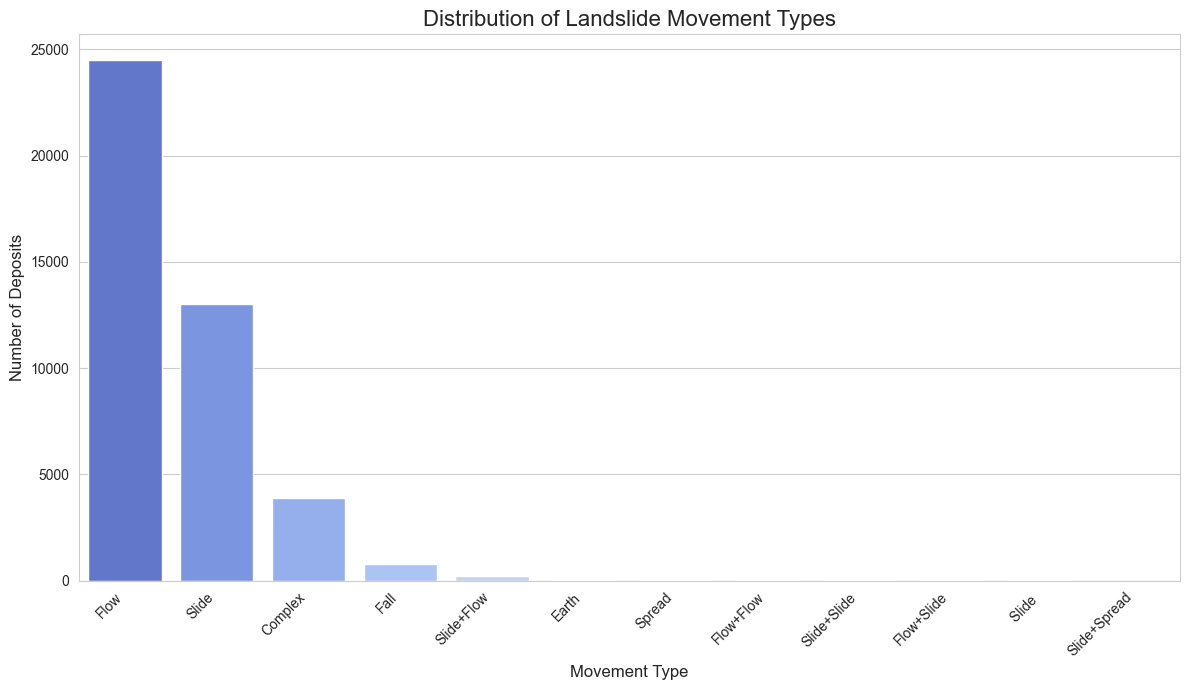

In [39]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7)) 

type_move_counts = deposits['TYPE_MOVE'].value_counts()


sns.barplot(x=type_move_counts.index, 
            y=type_move_counts.values, 
            palette='coolwarm',
            hue=type_move_counts.index)

plt.title('Distribution of Landslide Movement Types', fontsize=16)
plt.xlabel('Movement Type', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

# Rotate x-axis labels to prevent them from overlapping
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [36]:
moves = deposits['TYPE_MOVE'].str.split(r'\+|\s*\+\s*')  # splits on '+' with optional spaces
moves_exploded = deposits.assign(TYPE_MOVE=moves).explode('TYPE_MOVE')

In [38]:
normalized_counts = moves_exploded['TYPE_MOVE'].value_counts()
print(normalized_counts)

TYPE_MOVE
Flow       24689
Slide      13222
Complex     3898
Fall         772
Spread         7
Earth          7
Slide          2
Name: count, dtype: int64


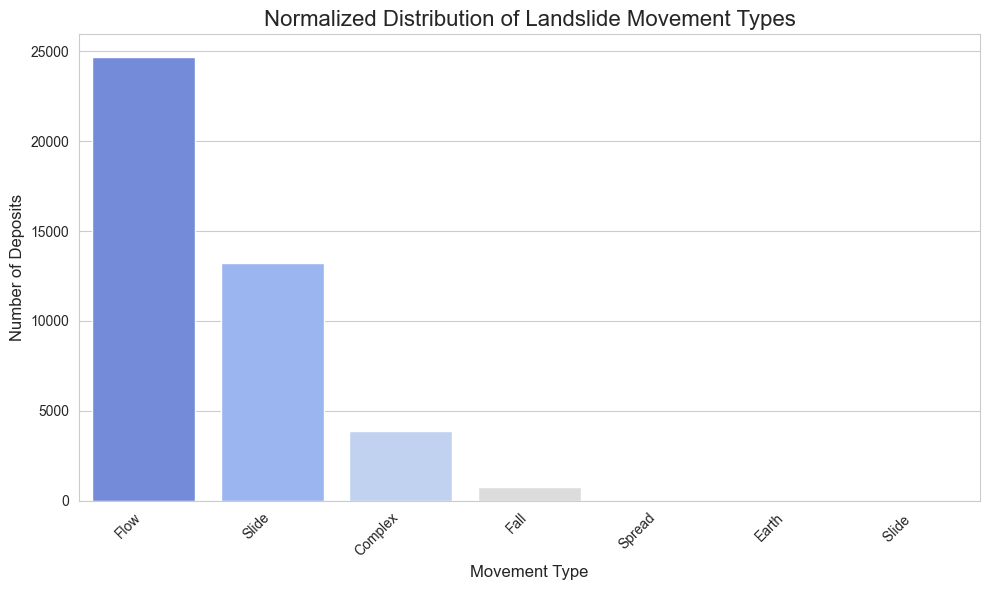

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=normalized_counts.index, 
    y=normalized_counts.values, 
    palette='coolwarm',
    hue=normalized_counts.index
)
plt.title('Normalized Distribution of Landslide Movement Types', fontsize=16)
plt.xlabel('Movement Type', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Move Class

In [22]:
print("\nValue counts for 'MOVE_CLASS':")
print(deposits['MOVE_CLASS'].value_counts())


Value counts for 'MOVE_CLASS':
MOVE_CLASS
Debris Flow                                    12753
Earth Flow                                      7044
Complex                                         6007
Rock Slide-Rotational                           5509
Rock Slide-Translational                        2445
                                               ...  
Debris Fall                                        1
Translational Slide                                1
Complex-Debris Slide-Rotational+Debris Flow        1
Rotational Slide (slump)                           1
Earth flow                                         1
Name: count, Length: 87, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_73444/83176855.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=move_class_counts.index, y=move_class_counts.values, palette='crest')


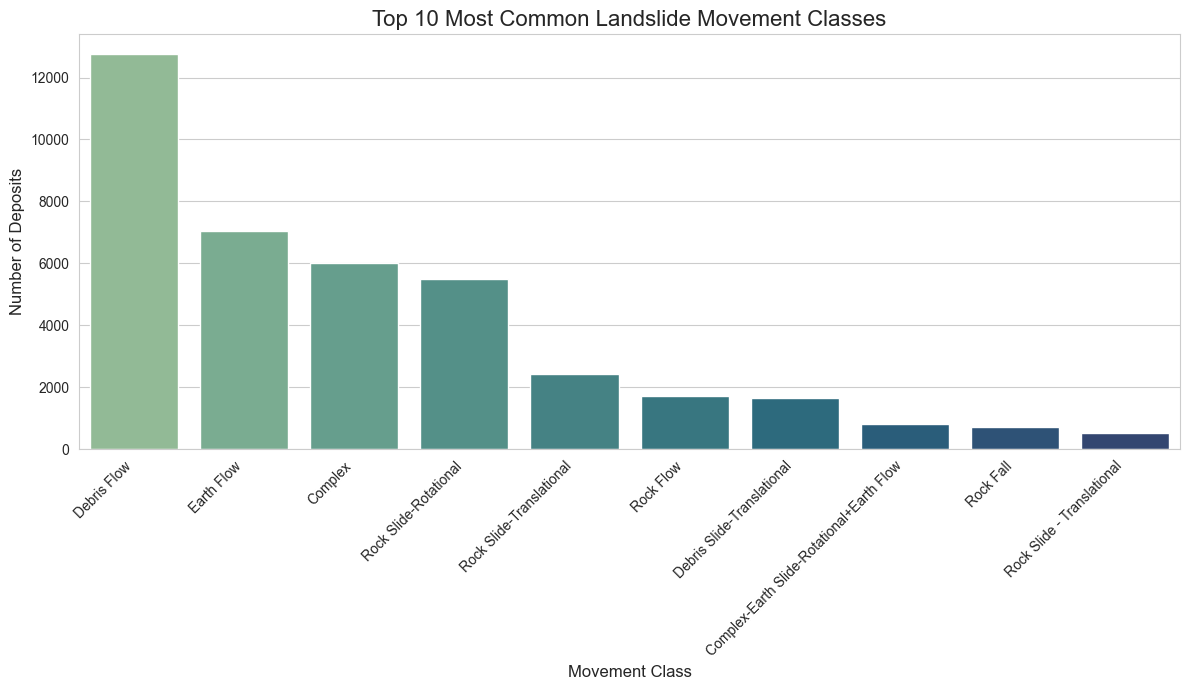

In [ ]:
# There are 87 unique movement classes, so we will focus on the top 10 most common ones for visualization.
# Plot for Top 10 MOVE_CLASS 
plt.figure(figsize=(12, 7))

move_class_counts = deposits['MOVE_CLASS'].value_counts().nlargest(10)

sns.barplot(x=move_class_counts.index, y=move_class_counts.values, palette='crest')

plt.title('Top 10 Most Common Landslide Movement Classes', fontsize=16)
plt.xlabel('Movement Class', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [46]:
deposits['MOVE_CLASS_main'] = (
    deposits['MOVE_CLASS']
      .str.lower()
      .str.replace(r'\s+', ' ', regex=True)
      .str.strip()
      .str.split(r'\+', n=1).str[0]                    # drop anything after '+'
      .str.replace(r'^complex[-\s]*', '', regex=True) # drop leading 'complex-'
      .str.replace(r'\s*-\s*', '-', regex=True)       # unify hyphens
      .str.strip()
)

# Now split on ANY of: '+', '&', 'and', ',' (with surrounding spaces)
split_regex = r'\s*(?:\+|&|and|,)\s*'
moves_list = deposits['MOVE_CLASS_main'].str.split(split_regex)

# Explode into one row per base class
moves_exploded = deposits.assign(MOVE_CLASS_main=moves_list).explode('MOVE_CLASS_main')

# Final clean (in case the split left stray spaces) and re-count
moves_exploded['MOVE_CLASS_main'] = moves_exploded['MOVE_CLASS_main'].str.strip()
final_counts = moves_exploded['MOVE_CLASS_main'].value_counts()

print("\nValue counts for 'MOVE_CLASS_main' after full explosion:")
print(final_counts)



Value counts for 'MOVE_CLASS_main' after full explosion:
MOVE_CLASS_main
debris flow                           12755
earth flow                             7439
rock slide-rotational                  6760
                                       6007
rock slide-translational               3259
debris slide-translational             1805
rock flow                              1729
earth slide-rotational                 1692
rock fall                               751
earth slide-translational               290
debris slide-rotational                 146
combined slump-earth flow                37
earth fall                               25
rock slide-r                             19
combined earth slide-rotational          10
channelized debris flow deposition        8
earthflow                                 4
combined rock slide-rotational            3
debris spread                             2
rotational slide (slump)                  1
translational slide                       1
de

In [59]:
corrections = {
    'earthflow': 'earth flow',
    'debrs flow': 'debris flow',
    'rockslide translational': 'rock slide-translational',
    'rockslide-translational': 'rock slide-translational',
    'debris slide-rotiational': 'debris slide-rotational',
    'debris slide-transtional': 'debris slide-translational',
}

moves_exploded['MOVE_CLASS_main'] = (
    moves_exploded['MOVE_CLASS_main']
      .replace(corrections)                          # fix known typos
      .str.replace(r'^combined\s+', '', regex=True)  # drop leading "combined "
      .str.strip()                                   # trim any edges
)

final_counts = moves_exploded['MOVE_CLASS_main'].value_counts()
print("\nValue counts for 'MOVE_CLASS_main' after manual fixes:")
print(final_counts)



Value counts for 'MOVE_CLASS_main' after manual fixes:
MOVE_CLASS_main
debris flow                           12756
earth flow                             7443
rock slide-rotational                  6763
                                       6007
rock slide-translational               3260
debris slide-translational             1806
rock flow                              1729
earth slide-rotational                 1702
rock fall                               751
earth slide-translational               290
debris slide-rotational                 147
slump-earth flow                         37
earth fall                               25
rock slide-r                             19
channelized debris flow deposition        8
debris spread                             2
rotational slide (slump)                  1
translational slide                       1
debris fall                               1
earth topple                              1
earth spread                              1
Name

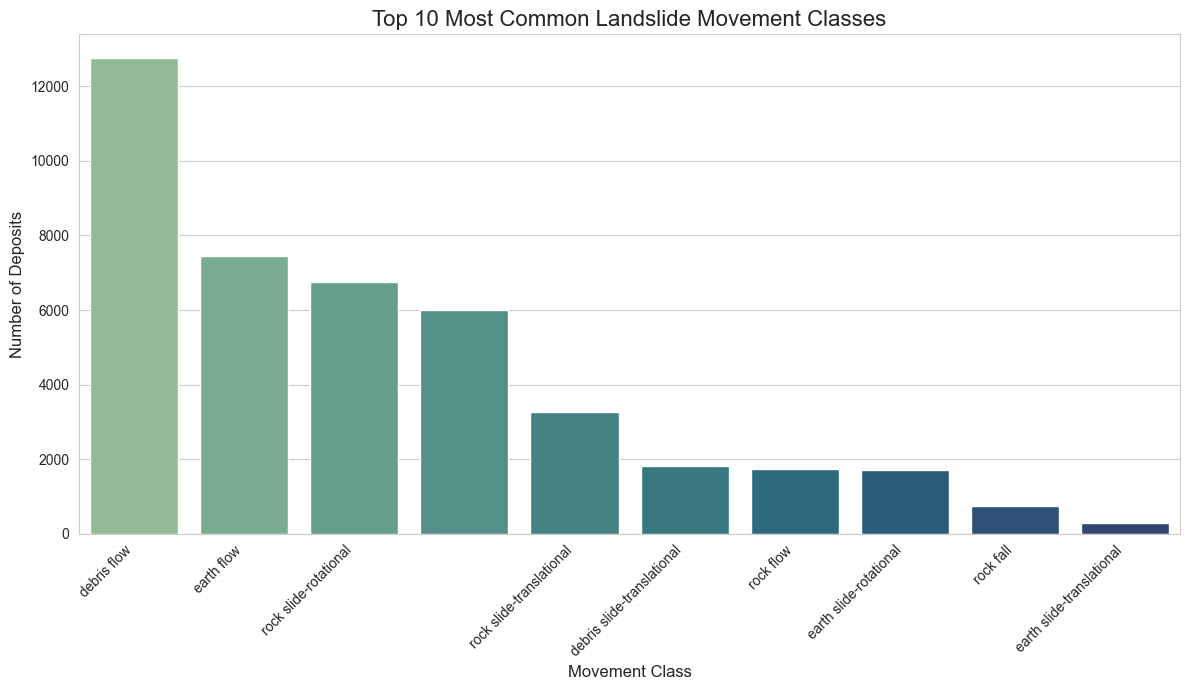

In [58]:
# Plot for Top 10 MOVE_CLASS 
plt.figure(figsize=(12, 7))

plot_final_counts = final_counts.nlargest(10)  # Get the top 10 most common classes

sns.barplot(x=plot_final_counts.index, y=plot_final_counts.values, palette='crest',hue=plot_final_counts.index)

plt.title('Top 10 Most Common Landslide Movement Classes', fontsize=16)
plt.xlabel('Movement Class', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Move Code

In [23]:
print("\nValue counts for 'MOVE_CODE':")
print(deposits['MOVE_CODE'].value_counts())


Value counts for 'MOVE_CODE':
MOVE_CODE
DFL              12752
EFL               6919
RS-R+EFL          4518
RS-R              4407
RFL+EFL           2948
                 ...  
EFL+ES-T             1
C-ES+EFL             1
DS-R+DS-T            1
RS-R+RS-T+DFL        1
RS-R + EFL           1
Name: count, Length: 139, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_72431/1238503236.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=move_code_counts.index, y=move_code_counts.values, palette='crest')


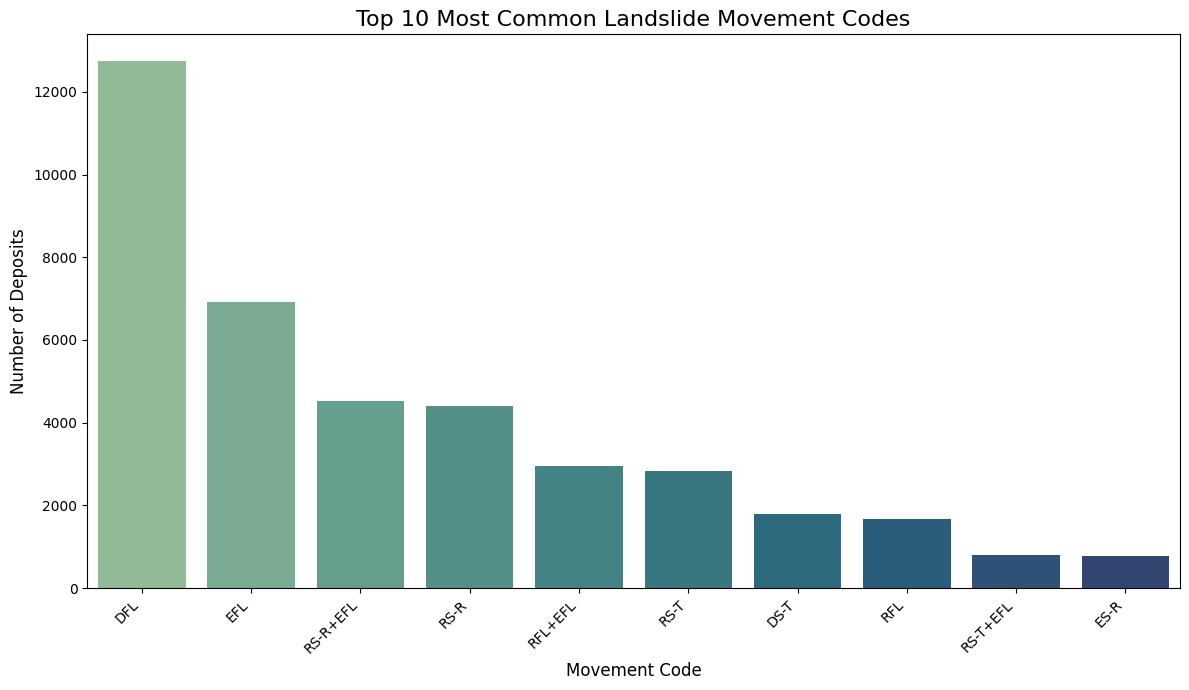

In [24]:
# There are 139 unique movement code, so we will focus on the top 10 most common ones for visualization.
# Plot for Top 10 MOVE_CODE 
plt.figure(figsize=(12, 7))

# Get the counts for the top 10 most frequent movement codes
move_code_counts = deposits['MOVE_CODE'].value_counts().nlargest(10)

# Create the bar plot
sns.barplot(x=move_code_counts.index, y=move_code_counts.values, palette='crest')

# Add titles and labels
plt.title('Top 10 Most Common Landslide Movement Codes', fontsize=16)
plt.xlabel('Movement Code', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [64]:
deposits['MOVE_CODE_clean'] = deposits['MOVE_CODE'] \
    .str.strip() \
    .str.replace(r'\s*\+\s*', '+', regex=True)

moves = deposits['MOVE_CODE_clean'].str.split(r'\+')
moves_exploded = deposits.assign(MOVE_CODE_clean=moves).explode('MOVE_CODE_clean')

code_counts = moves_exploded['MOVE_CODE_clean'].value_counts()
print(code_counts.shape)
print(code_counts)



(48,)
MOVE_CODE_clean
EFL                  16375
DFL                  12809
RS-R                  9286
RFL                   4716
RS-T                  3994
DS-T                  1825
ES-R                  1705
RF                     819
ES-T                   311
DS-R                   146
C                       83
EF                      52
ES-R-EFL                36
RT                      19
DS-R-DFL                13
C-EFL                   12
DS-T-DFL                 9
RS-R-DFL                 9
RS-R-EFL                 5
RS-R_EFL                 3
ES-R-DFL                 3
EFL_RS-R                 3
RS_T                     3
DSP                      3
ELF                      2
DF                       2
TS-T                     2
EFL\r\nEFL\r\nEFL        2
EFL\r\nRS-R              2
RS_R                     1
RS                       1
ES-R_EFL                 1
EFS-R                    1
ESL                      1
C-ES                     1
EFLS                     1
DS-R-E

/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_72431/2963013052.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_codes.index, y=top10_codes.values, palette='crest')


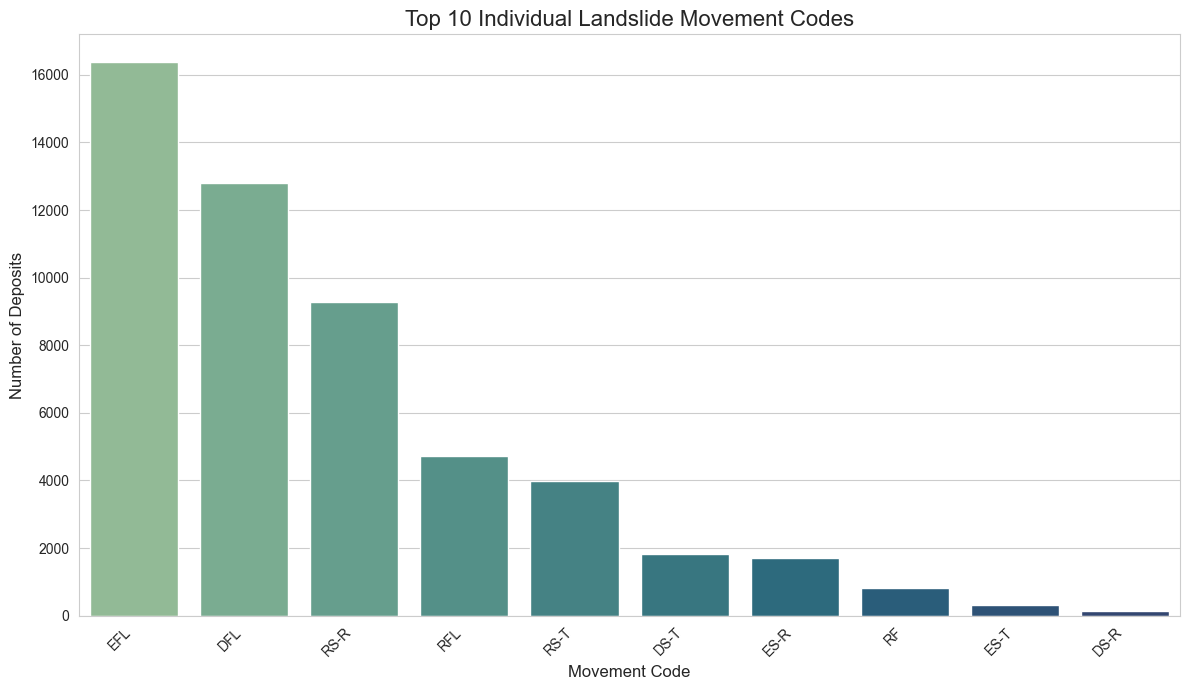

In [65]:
top10_codes = code_counts.nlargest(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top10_codes.index, y=top10_codes.values, palette='crest')
plt.title('Top 10 Individual Landslide Movement Codes', fontsize=16)
plt.xlabel('Movement Code', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [70]:
manual_splits = {
    'ES-R-EFL':       ['ES-R', 'EFL'],
    'RS-R-DFL':       ['RS-R', 'DFL'],
    'DS-T-DFL':       ['DS-T', 'DFL'],
    'RS-T-DFL':       ['RS-T', 'DFL'],
    'RS-T-EFL':       ['RS-T', 'EFL'],
    'DS-R-DFL':       ['DS-R', 'DFL'],
    'DS-R-EFL':       ['DS-R', 'EFL'],
    'DFL-ES-R':       ['DFL', 'ES-R'],
    'DFL-DS-R':       ['DFL', 'DS-R'],
    'RS-R-EFL':       ['RS-R', 'EFL'],
    'RS-R-RS-T':      ['RS-R', 'RS-T'],
    'EFL-RFL':        ['EFL', 'RFL'],
    'C-EFL':          ['C',    'EFL'],
    'RS-R_EFL':       ['RS-R', 'EFL'],  # underscore variant
    'ES-R_EFL':       ['ES-R', 'EFL'],
    'ES-R-DFL':     ['ES-R', 'DFL'],
    'EFL_RS-R':       ['EFL', 'RS-R'],
}
\
moves_exploded['MOVE_CODE_final'] = moves_exploded['MOVE_CODE_clean'].apply(
    lambda code: manual_splits.get(code, [code])
)
final_codes = moves_exploded \
                .assign(MOVE_CODE_final=moves_exploded['MOVE_CODE_final']) \
                .explode('MOVE_CODE_final')

final_codes['MOVE_CODE_final'] = final_codes['MOVE_CODE_final'].str.strip()
final_counts = final_codes['MOVE_CODE_final'].value_counts()

print("\nFinal MOVE_CODE counts after manual fixes:")
print(final_counts.shape)
print(final_counts)



Final MOVE_CODE counts after manual fixes:
(31,)
MOVE_CODE_final
EFL                  16438
DFL                  12846
RS-R                  9307
RFL                   4717
RS-T                  3997
DS-T                  1834
ES-R                  1746
RF                     819
ES-T                   311
DS-R                   161
C                       95
EF                      52
RT                      19
DSP                      3
RS_T                     3
TS-T                     2
EFL\r\nRS-R              2
DF                       2
ELF                      2
EFL\r\nEFL\r\nEFL        2
EFL\r\nEFL               1
DS_R                     1
EFFL                     1
RS_R                     1
C-ES                     1
ESL                      1
EFS-R                    1
ET                       1
RS                       1
EFLS                     1
ES                       1
Name: count, dtype: int64


#### Confidence

In [44]:
print("\nValue counts for 'CONFIDENCE':")
print(deposits['CONFIDENCE'].value_counts())


Value counts for 'CONFIDENCE':
CONFIDENCE
Moderate (11-29)     21774
High (=>30)          14541
Low (=<10)            5723
Moderate (20-30)        46
High (>30)              26
Low (<20)               10
Moderate (11-29)         5
High (=<30)              1
Moderate (15-29)         1
Name: count, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_73444/3102376851.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=confidence_counts.index, y=confidence_counts.values, palette='coolwarm')


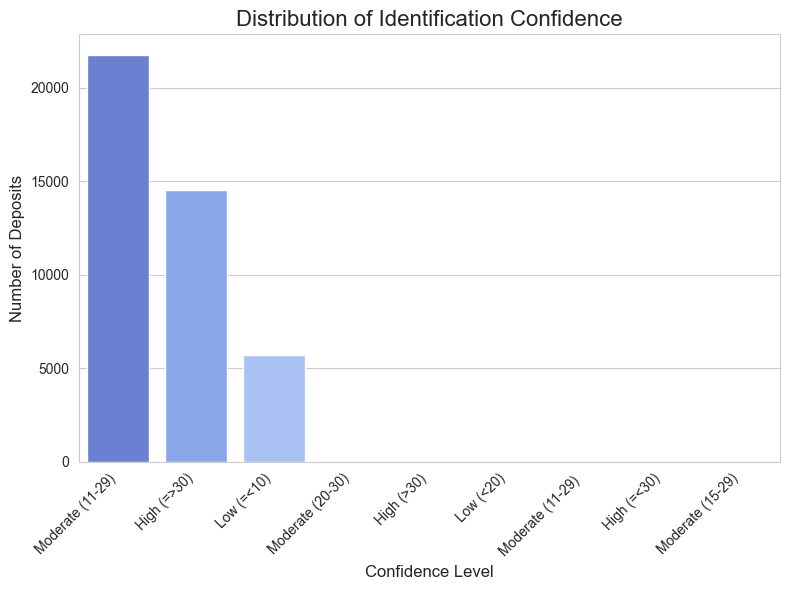

In [54]:
plt.figure(figsize=(8, 6))

# Get the value counts
confidence_counts = deposits['CONFIDENCE'].value_counts()

# Create the bar plot
sns.barplot(x=confidence_counts.index, y=confidence_counts.values, palette='coolwarm')

# Add titles and labels for clarity
plt.title('Distribution of Identification Confidence', fontsize=16)
plt.xlabel('Confidence Level', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Deep Shallow

In [47]:
print("\nValue counts for 'DEEP_SHAL':")
print(deposits['DEEP_SHAL'].value_counts())


Value counts for 'DEEP_SHAL':
DEEP_SHAL
Deep        21103
Shallow      7487
             1046
<Null>        218
                9
Shallow         5
Name: count, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_73444/3790632871.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deep_shal_counts.index, y=deep_shal_counts.values, palette='coolwarm')


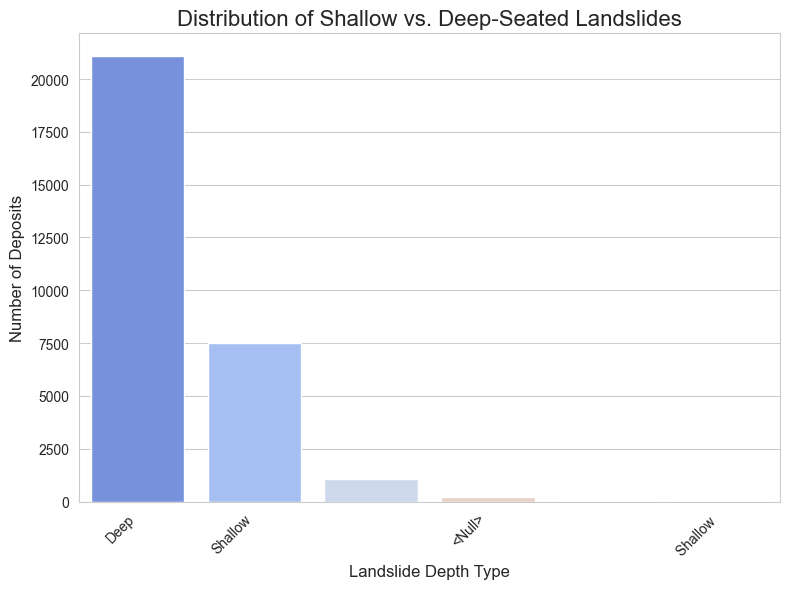

In [49]:
# Plot for DEEP_SHAL
plt.figure(figsize=(8, 6))

# Get the value counts
deep_shal_counts = deposits['DEEP_SHAL'].value_counts()

# Create the bar plot
sns.barplot(x=deep_shal_counts.index, y=deep_shal_counts.values, palette='coolwarm')

# Add titles and labels
plt.title('Distribution of Shallow vs. Deep-Seated Landslides', fontsize=16)
plt.xlabel('Landslide Depth Type', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Geometry

In [20]:
print("\nValue counts for 'Geometry':")
print(deposits['geometry'].value_counts())


Value counts for 'Geometry':
geometry
MULTIPOLYGON (((421150.385 1210193.293, 421320...    2
MULTIPOLYGON (((1224253.08 935108.602, 1224261...    2
MULTIPOLYGON (((427294.89 1125696.03, 427172.5...    2
MULTIPOLYGON (((416408.371 1122262.985, 416339...    2
MULTIPOLYGON (((414414.143 1124263.076, 414134...    2
                                                    ..
MULTIPOLYGON (((1034865.706 1350308.531, 10348...    1
MULTIPOLYGON (((1034475.805 1350036.901, 10344...    1
MULTIPOLYGON (((1033219.696 1333439.721, 10332...    1
MULTIPOLYGON (((1028343.229 1327313.128, 10283...    1
MULTIPOLYGON (((1658521.16 686230.443, 1658534...    1
Name: count, Length: 71219, dtype: int64


In [65]:
deposits['geometry_type'] = deposits['geometry'].geom_type
print("\nValue counts for 'Geometry':")
print(deposits['geometry_type'].value_counts())


Value counts for 'Geometry':
geometry_type
MultiPolygon    71318
Name: count, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_73444/1413330191.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geometry_counts.index, y=geometry_counts.values, palette='plasma')


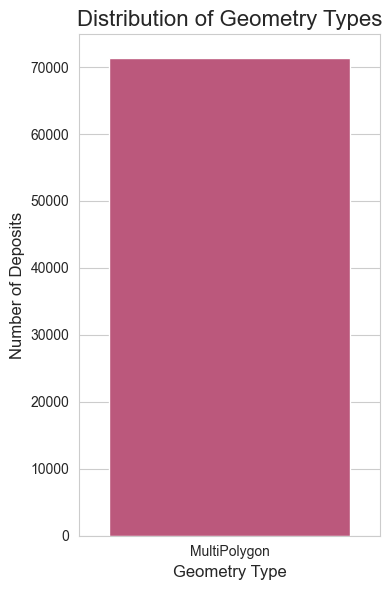

In [66]:
plt.figure(figsize=(4, 6))

geometry_counts = deposits['geometry_type'].value_counts()

# Create the bar plot
sns.barplot(x=geometry_counts.index, y=geometry_counts.values, palette='plasma')

# Add titles and labels for clarity
plt.title('Distribution of Geometry Types', fontsize=16)
plt.xlabel('Geometry Type', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

plt.tight_layout()
plt.show()

#### REACTIVATION

In [69]:
print("\nValue counts for 'REACTIVATION':")
print(deposits['REACTIVATION'].value_counts())


Value counts for 'REACTIVATION':
REACTIVATION
2005-2009                       3
2005                            3
2007                            2
2006                            2
1995                            1
2010                            1
1989 mitigated                  1
2005-2009, 2009-2011            1
2000-2005                       1
1965, 1980, 1985, 1995, 1996    1
1970, 2006, Sept 21             1
2009                            1
2010, March 16                  1
1997                            1
2014                            1
Name: count, dtype: int64


#### GEOL

In [74]:
print("\nValue counts for 'GEOL':")
print(deposits['GEOL'].value_counts())


Value counts for 'GEOL':
GEOL
Tt                3607
Tet               1906
Tet3              1614
Tte               1462
Tef               1380
                  ... 
Th, Tfsh             1
Tgo, Tgsb            1
Tfg, Tgsb, Twh       1
QTvu, Qff, Qth       1
Trh, Twf, Tgh        1
Name: count, Length: 1395, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_73444/1833246534.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geol_counts.index, y=geol_counts.values, palette='crest')


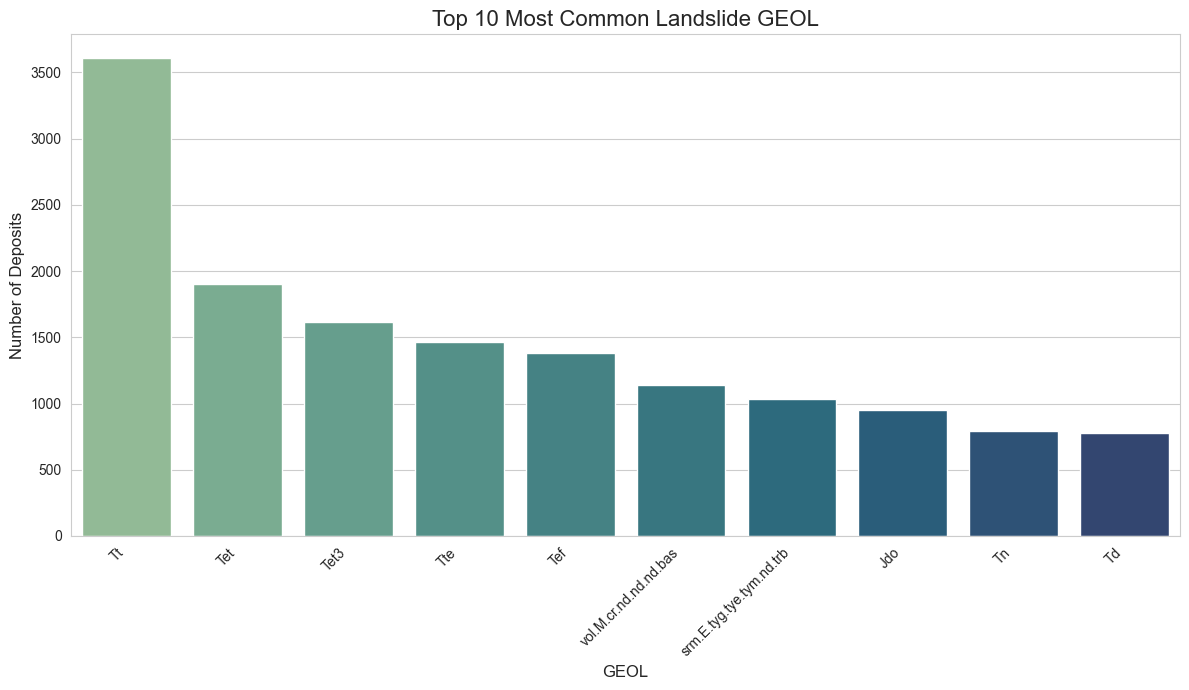

In [75]:
# There are 1395 unique GEOL, so we will focus on the top 10 most common ones for visualization.
# Plot for Top 10 GEOL
plt.figure(figsize=(12, 7))

# Get the counts for the top 10 most frequent GEOL
geol_counts = deposits['GEOL'].value_counts().nlargest(10)

# Create the bar plot
sns.barplot(x=geol_counts.index, y=geol_counts.values, palette='crest')

# Add titles and labels
plt.title('Top 10 Most Common Landslide GEOL', fontsize=16)
plt.xlabel('GEOL', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Map Unit L


In [27]:
print("\nValue counts for 'GEOL':")
print(deposits['MAP_UNIT_L'].value_counts())


Value counts for 'GEOL':
MAP_UNIT_L
Qls          10862
Hls           3602
Qaf           2923
DFL           1714
Fan           1141
             ...  
ct               1
Rock fall        1
Ab               1
Qsb/Tma          1
Qsb/Tbu          1
Name: count, Length: 189, dtype: int64


/var/folders/4l/861pz_dj397_gz1sywdvrptw0000gq/T/ipykernel_72431/2436049659.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=map_unit_counts.index, y=map_unit_counts.values, palette='crest')


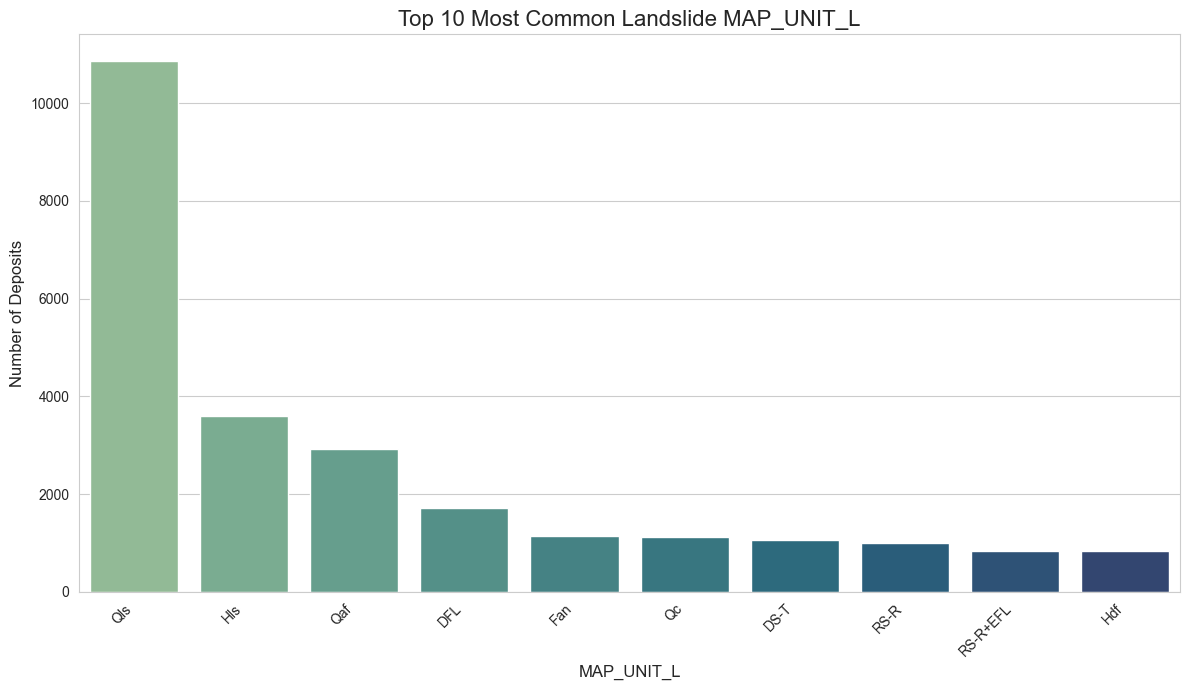

In [28]:
# There are 189 unique MAP_UNIT_L, so we will focus on the top 10 most common ones for visualization.
# Plot for Top 10 MAP_UNIT_L
plt.figure(figsize=(12, 7))

# Get the counts for the top 10 most frequent MAP_UNIT_L
map_unit_counts = deposits['MAP_UNIT_L'].value_counts().nlargest(10)

# Create the bar plot
sns.barplot(x=map_unit_counts.index, y=map_unit_counts.values, palette='crest')

# Add titles and labels
plt.title('Top 10 Most Common Landslide MAP_UNIT_L', fontsize=16)
plt.xlabel('MAP_UNIT_L', fontsize=12)
plt.ylabel('Number of Deposits', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Inspect Historic Landslide Data (Points)

In [6]:
import geopandas as gpd

# Analyze the Deposits polygons
historic = gpd.read_file(gdb_dir, layer="Historic_Landslide_Points")

In [8]:
# Basic info
print(historic.shape)      # (n_features, n_fields_including_geometry)
print(historic.dtypes)     # field names and types

(15386, 28)
REF_ID_COD        object
UNIQUE_ID         object
DATA_SOURC        object
LOC_METHOD        object
ORIG_ID           object
SLIDE_NAME        object
LENGTH_ft        float32
WIDTH_ft         float32
DEPTH_ft         float32
SLOPE            float32
TYPE_MOVE         object
MOVE_CLASS        object
CONTR_FACT        object
TYPE_MTRL         object
AREA_ft2         float32
VOLUME_ft3       float32
DEEP_SHAL         object
DAMAGES           object
LOSSES            object
COMMENTS          object
ANNUAL_COST      float32
REPAIR_COST      float32
YEAR             float64
DATE_RANGE        object
REACTIVATION      object
MONTH             object
DAY               object
geometry        geometry
dtype: object


In [9]:
historic.head(10)

,REF_ID_COD,UNIQUE_ID,DATA_SOURC,LOC_METHOD,ORIG_ID,SLIDE_NAME,LENGTH_ft,WIDTH_ft,DEPTH_ft,SLOPE,...,LOSSES,COMMENTS,ANNUAL_COST,REPAIR_COST,YEAR,DATE_RANGE,REACTIVATION,MONTH,DAY,geometry
0,ODOT2011,LS_0,Oregon Department of Transportation,None,SL002-0116-92RE1,Matties Hump,0.0,0.0,0.0,0.0,...,None,Hwy Name:Columbia River; Hwy Number:002;Mile ...,47.680000,1.285220e+06,NaN,None,None,None,None,POINT (1285467.394 1454567.759)
1,ODOT2011,LS_1,Oregon Department of Transportation,None,SL002-0120-30RE1,None,0.0,0.0,0.0,0.0,...,None,Hwy Name:Columbia River; Hwy Number:002;Mile ...,237.110001,9.867860e+04,NaN,None,None,None,None,POINT (1300566.281 1446574.309)
2,ODOT2011,LS_2,Oregon Department of Transportation,None,SL002-0124-20RE1,Phillipi Canyon,0.0,0.0,0.0,0.0,...,None,Hwy Name:Columbia River; Hwy Number:002;Mile ...,47.680000,1.379360e+07,NaN,None,None,None,None,POINT (1316943.11 1435213.605)
3,ODOT2011,LS_3,Oregon Department of Transportation,None,SL002-0127-71RE1,None,0.0,0.0,0.0,0.0,...,None,Hwy Name:Columbia River; Hwy Number:002;Mile ...,246.259995,9.867860e+04,NaN,None,None,None,None,POINT (1336731.661 1437168.634)
4,ODOT2011,LS_4,Oregon Department of Transportation,None,SL002-0129-07RE1,Blalock Canyon RF West,0.0,0.0,0.0,0.0,...,None,Hwy Name:Columbia River; Hwy Number:002;Mile ...,47.680000,2.592600e+06,NaN,None,None,None,None,POINT (1342539.547 1437518.348)
5,ODOT2011,LS_5,Oregon Department of Transportation,None,SL002-0129-29RE1,Blalock Canyon East,0.0,0.0,0.0,0.0,...,None,Hwy Name:Columbia River; Hwy Number:002;Mile ...,47.680000,2.585750e+06,NaN,None,None,None,None,POINT (1343657.724 1437772.279)
6,ODOT2011,LS_6,Oregon Department of Transportation,None,SL002-0129-83RE1,None,0.0,0.0,0.0,0.0,...,None,Hwy Name:Columbia River; Hwy Number:002;Mile ...,47.680000,8.197120e+04,NaN,None,None,None,None,POINT (1346349.553 1438720.703)
7,ODOT2011,LS_7,Oregon Department of Transportation,None,SL002-0129-95RE1,None,0.0,0.0,0.0,0.0,...,None,Hwy Name:Columbia River; Hwy Number:002;Mile ...,47.680000,1.580700e+05,NaN,None,None,None,None,POINT (1346935.047 1439020.406)
8,ODOT2011,LS_8,Oregon Department of Transportation,None,SL002-0194-66RE1,None,0.0,0.0,0.0,0.0,...,None,Hwy Name:Columbia River; Hwy Number:002;Mile ...,288.429993,1.318560e+04,NaN,None,None,None,None,POINT (1665425.053 1524439.632)
9,ODOT2011,LS_9,Oregon Department of Transportation,None,SL002-0197-75RE1,None,0.0,0.0,0.0,0.0,...,None,Hwy Name:Columbia River; Hwy Number:002;Mile ...,9059.490234,8.103950e+05,NaN,None,None,None,None,POINT (1678224.475 1534044.927)


In [77]:
# Seperating deposits by column types
historic_numerical_cols = historic.select_dtypes(include=['number']).columns.tolist()

historic_non_numerical_cols = historic.select_dtypes(exclude=['number']).columns.tolist()

In [78]:
print("Numerical Columns:")
for col in historic_numerical_cols:
    print(f"  - {col}")

print("\nNon-Numerical Columns:")
for col in historic_non_numerical_cols:
    print(f"  - {col}")

Numerical Columns:
  - LENGTH_ft
  - WIDTH_ft
  - DEPTH_ft
  - SLOPE
  - AREA_ft2
  - VOLUME_ft3
  - ANNUAL_COST
  - REPAIR_COST
  - YEAR

Non-Numerical Columns:
  - REF_ID_COD
  - UNIQUE_ID
  - DATA_SOURC
  - LOC_METHOD
  - ORIG_ID
  - SLIDE_NAME
  - TYPE_MOVE
  - MOVE_CLASS
  - CONTR_FACT
  - TYPE_MTRL
  - DEEP_SHAL
  - DAMAGES
  - LOSSES
  - COMMENTS
  - DATE_RANGE
  - REACTIVATION
  - MONTH
  - DAY
  - geometry


In [79]:
print("\nStatistical summary for Numerical data:")
numerical_stats = deposits[numerical_cols].describe().T
print(numerical_stats[["min", "max", "mean", "std"]])


Statistical summary for Numerical data:
                  min               max          mean            std
SLOPE            0.00            315.00         15.44          13.60
HS_HEIGHT        0.00            800.00         24.22          37.36
FAN_HEIGHT       0.00            300.00          4.18          10.62
FAIL_DEPTH       0.00            772.74         20.88          31.91
HS_IS1           0.00          3,000.00         27.54          91.13
IS1_IS2          0.00          2,200.00         19.67          81.46
IS2_IS3          0.00          2,000.00         11.29          63.35
IS3_IS4          0.00          1,793.00          5.79          45.34
HD_AVE           0.00          4,379.00         24.41          95.79
DIRECT           0.00            360.00        125.79         123.42
AREA             0.00  5,512,616,448.00    724,164.88  24,467,072.00
VOL              0.00 75,733,303,296.00 28,632,256.00 589,173,056.00
YEAR         1,890.00          2,017.00      1,996.63         